## Exercise 2

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model # Model para 2 b)
from tensorflow.keras.layers import Dense, Input, Concatenate # Input e Concatenate adicionado para 2 b)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

#### Inputs and Labels

In [2]:
x = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
y = np.array([[0], [1], [1], [0]], "float32")

## a)

### Compile Networks & Test momentum

In [3]:
momentum_list = [0.0, 0.4, 0.9] 

In [4]:
# Function to compile with diferent act. function and with or without momentum
def compiler_a (test_values, function):
    model = Sequential([Dense(2, activation = function), Dense(1, activation = function)])
    for i in test_values:
        model.compile(loss="mean_squared_error", optimizer = SGD(momentum = i, learning_rate = .001), metrics = ["accuracy"]) # Learning Rate default is .001
        model.fit(x, y, epochs = 5000, batch_size = 1, verbose = 0)
        loss, accuracy = model.evaluate(x, y, verbose=0)
        print(f"With a {function} activation function and {i} of momentum, the loss is {loss} and the accuracy {accuracy}") 
        

#### sigmoid

In [18]:
compiler_a(momentum_list, "sigmoid")

With a sigmoid activation function and 0.0 of momentum, the loss is 0.2505200207233429 and the accuracy 0.5
With a sigmoid activation function and 0.4 of momentum, the loss is 0.24955503642559052 and the accuracy 0.5
With a sigmoid activation function and 0.9 of momentum, the loss is 0.22812910377979279 and the accuracy 0.75


#### tanh

In [19]:
compiler_a(momentum_list, "tanh")

With a tanh activation function and 0.0 of momentum, the loss is 0.24019236862659454 and the accuracy 0.5
With a tanh activation function and 0.4 of momentum, the loss is 0.161753311753273 and the accuracy 0.5
With a tanh activation function and 0.9 of momentum, the loss is 0.0011911485344171524 and the accuracy 1.0


#### relu

In [20]:
compiler_a(momentum_list, "relu")

With a relu activation function and 0.0 of momentum, the loss is 0.5 and the accuracy 0.5
With a relu activation function and 0.4 of momentum, the loss is 0.5 and the accuracy 0.5
With a relu activation function and 0.9 of momentum, the loss is 0.5 and the accuracy 0.5


### Loss and Accuracy analysis

#### Plot

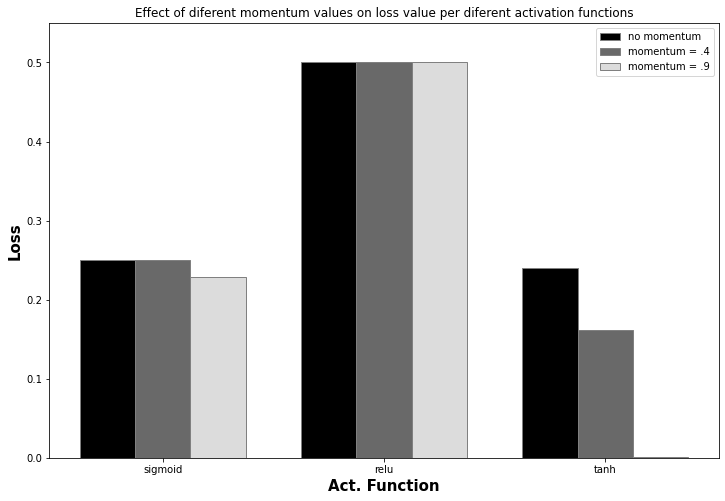

In [21]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
no_momentum = [.2505, .5, .2402]
momentum_4 = [0.2496, .5, .1618]
momentum_9 = [0.2281, .5, .0012]
br1 = np.arange(len(no_momentum))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, no_momentum, color ='black', width = barWidth,
        edgecolor ='grey', label ='no momentum')
plt.bar(br2, momentum_4, color ='dimgrey', width = barWidth,
        edgecolor ='grey', label ='momentum = .4')
plt.bar(br3, momentum_9, color ='gainsboro', width = barWidth,
        edgecolor ='grey', label ='momentum = .9')
# Adding Xticks
plt.xlabel('Act. Function', fontweight ='bold', fontsize = 15)
plt.ylabel('Loss', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(no_momentum))],['sigmoid', 'relu', 'tanh'])
plt.ylim(0, .55)
plt.legend()
plt.title("Effect of diferent momentum values on loss value per diferent activation functions")
plt.show()

#### Dataframe

In [24]:
df_accuracy_01 = pd.DataFrame({
  "sigmoid": [.5, .5, .75],
  "relu": [1, 1, 1],
  "tanh": [.5, .5, .5] 
  })
df_accuracy_01 = df_accuracy_01.rename(index={0: '0.0', 1: '0.4', 2: '0.9'})
df_accuracy_01 = df_accuracy_01.style.set_caption('Accuracy Values')


df_loss_01 = pd.DataFrame({
    "sigmoid": [.2505, .2496, .2281],
    "relu": [.5, .5, .5],
    "tanh": [.2402, .1618, .0012] 
  })
df_loss_01 = df_loss_01.rename(index={0: '0.0', 1: '0.4', 2: '0.9'})
df_loss_01 = df_loss_01.style.set_caption('Loss Values')

In [25]:
df_accuracy_01

,sigmoid,relu,tanh
0.0,0.500000,1,0.500000
0.4,0.500000,1,0.500000
0.9,0.750000,1,0.500000


In [26]:
df_loss_01

,sigmoid,relu,tanh
0.0,0.250500,0.500000,0.240200
0.4,0.249600,0.500000,0.161800
0.9,0.228100,0.500000,0.001200


#### Observations

It is possible to observe a tendency for the loss value to decrease when the momentum value increases on both sigmoid and relu activation functions. The same isnt true for the tanh activation funtion where there is no variation of the loss value.

In terms of accuracy there is a tendency for the accuracy to increase as the momentum value increases with a sigmoid function. FOr the relu and tanh there no variation is observed in terms of accuracy values

## b)

### Compile Networks & Test momentum

In [7]:
# Function to compile with diferent act. function and with or without momentum
def compiler_b (test_values, function):
    inputs = Input(shape=(2,)) 
    out = Dense(1, activation= function)(inputs)
    o = Concatenate(axis=1)([out, inputs]) 
    out2 = Dense(1, activation = function)(o)
    model = Model(inputs = inputs,outputs = out2)
    for i in test_values:
        model.compile(loss="mean_squared_error", optimizer = SGD(momentum = i), metrics = ["accuracy"]) # Learning Rate default is .001
        model.fit(x, y, epochs = 5000, batch_size = 1, verbose = 0)
        loss, accuracy = model.evaluate(x, y, verbose=0)
        print(f"With a {function} activation function and {i} of momentum, the loss is {loss} and the accuracy {accuracy}")

#### sigmoid

In [8]:
compiler_b(momentum_list, "sigmoid")

With a sigmoid activation function and 0.0 of momentum, the loss is 0.2499847263097763 and the accuracy 0.5
With a sigmoid activation function and 0.4 of momentum, the loss is 0.24908964335918427 and the accuracy 0.75
With a sigmoid activation function and 0.9 of momentum, the loss is 0.007289158180356026 and the accuracy 1.0


#### tanh

In [9]:
compiler_b(momentum_list, "tanh")

With a tanh activation function and 0.0 of momentum, the loss is 0.0019186618737876415 and the accuracy 1.0
With a tanh activation function and 0.4 of momentum, the loss is 0.0005928752943873405 and the accuracy 1.0
With a tanh activation function and 0.9 of momentum, the loss is 0.00011006451677531004 and the accuracy 1.0


#### relu

In [10]:
compiler_b(momentum_list, "relu")

With a relu activation function and 0.0 of momentum, the loss is 0.5 and the accuracy 0.5
With a relu activation function and 0.4 of momentum, the loss is 0.5 and the accuracy 0.5
With a relu activation function and 0.9 of momentum, the loss is 0.5 and the accuracy 0.5


### Loss and Accuracy analysis

#### Plot

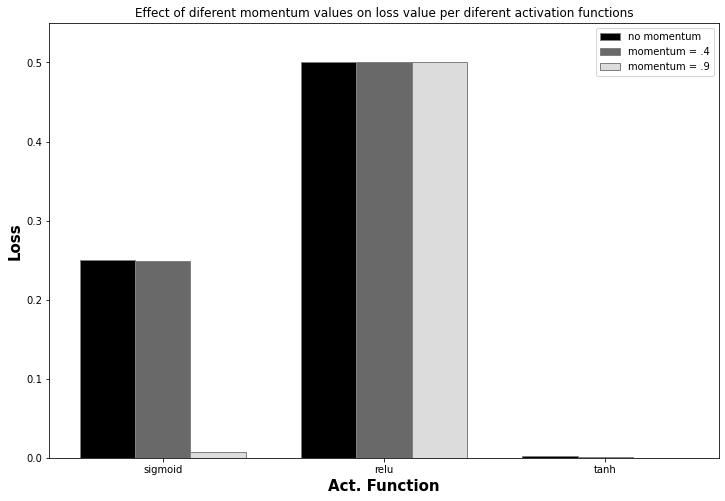

In [27]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
no_momentum = [.2499, .5, .0019]
momentum_4 = [0.2491, .5, .0006]
momentum_9 = [0.0073, .5, .0001]
br1 = np.arange(len(no_momentum))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, no_momentum, color ='black', width = barWidth,
        edgecolor ='grey', label ='no momentum')
plt.bar(br2, momentum_4, color ='dimgrey', width = barWidth,
        edgecolor ='grey', label ='momentum = .4')
plt.bar(br3, momentum_9, color ='gainsboro', width = barWidth,
        edgecolor ='grey', label ='momentum = .9')
# Adding Xticks
plt.xlabel('Act. Function', fontweight ='bold', fontsize = 15)
plt.ylabel('Loss', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(no_momentum))],['sigmoid', 'relu', 'tanh'])
plt.ylim(0, .55)
plt.legend()
plt.title("Effect of diferent momentum values on loss value per diferent activation functions")
plt.show()

#### Dataframe

In [28]:
df_accuracy_02 = pd.DataFrame({
  "sigmoid": [.5, .75, 1],
  "relu": [.5, .5, .5],
  "tanh": [.1, .1, .1] 
  })
df_accuracy_02 = df_accuracy_02.rename(index={0: '0.0', 1: '0.4', 2: '0.9'})
df_accuracy_02 = df_accuracy_02.style.set_caption('Accuracy Values')


df_loss_02 = pd.DataFrame({
    "sigmoid": [.2499, .2491, .0073],
    "relu": [.5, .5, .5],
    "tanh": [.0019, .0006, .0001] 
  })
df_loss_02 = df_loss_02.rename(index={0: '0.0', 1: '0.4', 2: '0.9'})
df_loss_02 = df_loss_02.style.set_caption('Loss Values')

In [29]:
df_accuracy_02

,sigmoid,relu,tanh
0.0,0.500000,0.500000,0.100000
0.4,0.750000,0.500000,0.100000
0.9,1.000000,0.500000,0.100000


In [30]:
df_loss_02

,sigmoid,relu,tanh
0.0,0.249900,0.500000,0.001900
0.4,0.249100,0.500000,0.000600
0.9,0.007300,0.500000,0.000100


#### Observations

There is a tendency for the accuracy to improve as the momentum arrise for the sigmoid. For the relu and tanh there is no accuracy variation.
THere is a tendency for the loss value to decrease as the momentum increases for the sigmoid and relu. For the tanh there is no variation.

## Comparison between 2 Networks

It is possible to observe the same efects of varying momentum and activation function on both Networks.